In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('fanfic_regression_data_curated_robcheck.tsv', sep = '\t')

In [3]:
len(df_all)

662728

In [4]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [5]:
df_all['Term_novelty'].head()

0    0.888159
1    0.353749
2    0.855796
3    0.706213
4    0.732386
Name: Term_novelty, dtype: float64

In [6]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)
term_ave = np.average(df_all['Term_novelty'])
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Term_novelty'] = df_all['Term_novelty'] - term_ave
df_all['Topic_novelty'] = df_all['Topic_novelty'] - topic_ave
df_all['Term_novelty_squared'] = np.square(df_all['Term_novelty'])
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty'])

In [7]:
len(df_all)

662728

In [8]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [9]:
# df_all = df_all.replace([np.inf, -np.inf], np.nan)
# df_all = df_all.dropna(how = 'any')

In [10]:
# df_all = df_all[['Chapters',\
#         'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
#         'Freq_relationship', 'Category_F_M',\
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
#        'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
#        'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
#        'ArchiveWarnings_violence','ArchiveWarnings_noncon',\
#        'author_fic_cnt', 'Rating_G',\
#        'Rating_M', 'Rating_N', 'Rating_T',\
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [11]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

### Logistic

In [12]:
def run_logit(df, field):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [13]:
def run_ols(df, field):
    df = run_logit(df, field)
    df = df[df[field] != 0]
    print(len(df))
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
 + Chapters + Freq_relationship + author_fic_cnt  \
 + Category_Gen + Category_F_M + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock \
 + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [14]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:-1])
kudos_err = list(kudos_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.077033
         Iterations: 35
         Function evaluations: 70
         Gradient evaluations: 66


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


651096


/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/anaconda3/envs/pytho

In [15]:
ylabels =['Term novelty', 'Term novelty squared', 'Topic novelty', 'Topic novelty squared', 'Chapters', \
 'Frequent relationship',' Author work count',\
 'Category (General)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)','Category (Unknown)\
 ','ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
 ArchiveWarnings (Non-consensual sex)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)\
 ',' Fandom (DC) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
 Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]

In [16]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1]
hits_err = list(hits_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.091978
         Iterations: 35
         Function evaluations: 59
         Gradient evaluations: 55


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


650390


/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/anaconda3/envs/py

In [17]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1]
comments_err = list(comments_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


350735


/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [18]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.422702
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 41


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


534944


/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/anaconda3/envs/pytho

In [19]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [20]:
# fig, ax = plt.subplots(1,4,figsize = (15,15))
# ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

# ax[0].set_yticks(range(len(kudos_coef)))
# ax[0].set_yticklabels(ylabels)
# ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].set_ylim(-0.5,43.5)
# ax[0].set_xlim(-3,6)
# ax[0].set_xlabel('Kudos', fontsize=15)
# ax[0].set_title('R-squared = 0.256', fontsize=15)
# for tick in ax[0].yaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
# for tick in ax[0].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
    
# ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
# ax[1].set_yticks(range(len(hits_coef)))
# # ax[1].set_yticklabels(ylabels)
# ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].set_ylim(-0.5,43.5)
# ax[1].set_xlim(-3,8.5)
# ax[1].set_yticklabels([])
# ax[1].set_title('R-squared = 0.209', fontsize=15)
# ax[1].set_xlabel('Hits', fontsize=15)
# for tick in ax[1].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
    
# ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
# ax[2].set_yticks(range(len(comments_coef)))
# ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].set_ylim(-0.5,43.5)
# ax[2].set_xlim(-2,3)
# ax[2].set_yticklabels([])
# ax[2].set_title('R-squared = 0.062', fontsize=15)
# ax[2].set_xlabel('Comments', fontsize=15)
# for tick in ax[2].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)

# ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
# ax[3].set_yticks(range(len(bookmarks_coef)))
# ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].set_ylim(-0.5,43.5)
# ax[3].set_xlim(-3,6)
# ax[3].set_yticklabels([])
# ax[3].set_title('R-squared =  0.266', fontsize=15)
# ax[3].set_xlabel('Bookmarks', fontsize=15)
# for tick in ax[2].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
    
# fig.text(0.55, 0.001, 'N = 662793', fontsize = 15)
# plt.tight_layout()
# plt.savefig('ols_coefs_full_twoparts.pdf', format='pdf')

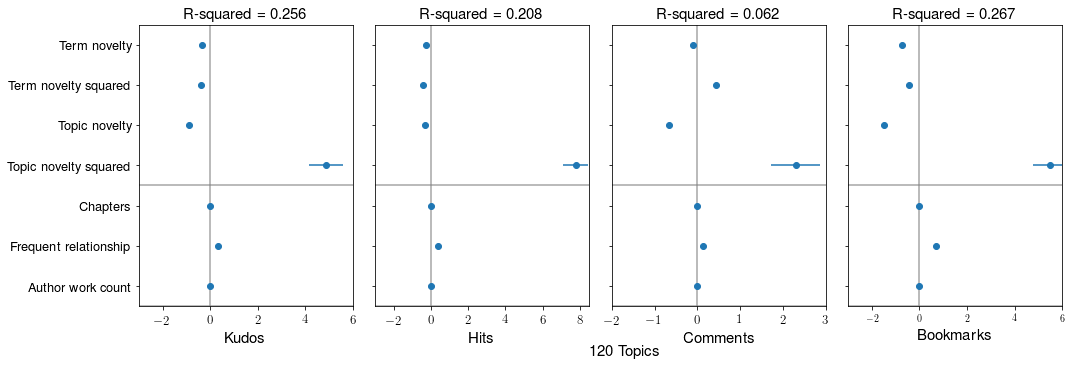

In [26]:
fig, ax = plt.subplots(1,4,figsize = (15,5))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].set_ylim(36.5,43.5)
ax[0].set_xlim(-3,6)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('R-squared = 0.256', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].set_ylim(36.5,43.5)
ax[1].set_xlim(-3,8.5)
ax[1].set_yticklabels([])
ax[1].set_title('R-squared = 0.208', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].set_ylim(36.5,43.5)
ax[2].set_xlim(-2,3)
ax[2].set_yticklabels([])
ax[2].set_title('R-squared = 0.062', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].set_ylim(36.5,43.5)
ax[3].set_xlim(-3,6)
ax[3].set_yticklabels([])
ax[3].set_title('R-squared = 0.267', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
fig.text(0.55, 0.001, '120 Topics', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_partial_topic120.pdf', format='pdf')

In [22]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     2448.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:43:46   Log-Likelihood:            -4.8626e+05
No. Observations:              313055   AIC:                         9.726e+05
Df Residuals:                  313010   BIC:                         9.731e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [23]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1873.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:43:46   Log-Likelihood:            -4.6971e+05
No. Observations:              313055   AIC:                         9.395e+05
Df Residuals:                  313010   BIC:                         9.400e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [24]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:43:46   Log-Likelihood:            -4.1348e+05
No. Observations:              313055   AIC:                         8.270e+05
Df Residuals:                  313011   BIC:                         8.275e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [25]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     2586.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:43:46   Log-Likelihood:            -4.8485e+05
No. Observations:              313055   AIC:                         9.698e+05
Df Residuals:                  313010   BIC:                         9.703e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           